# Uncover the Factors that lead to Employee Attrition 

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

### Acquire Data 

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#no null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
#replace attrition, overtime, over 18 column with integers before performing any visualizations 
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x:1 if x == 'Yes' else 0)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

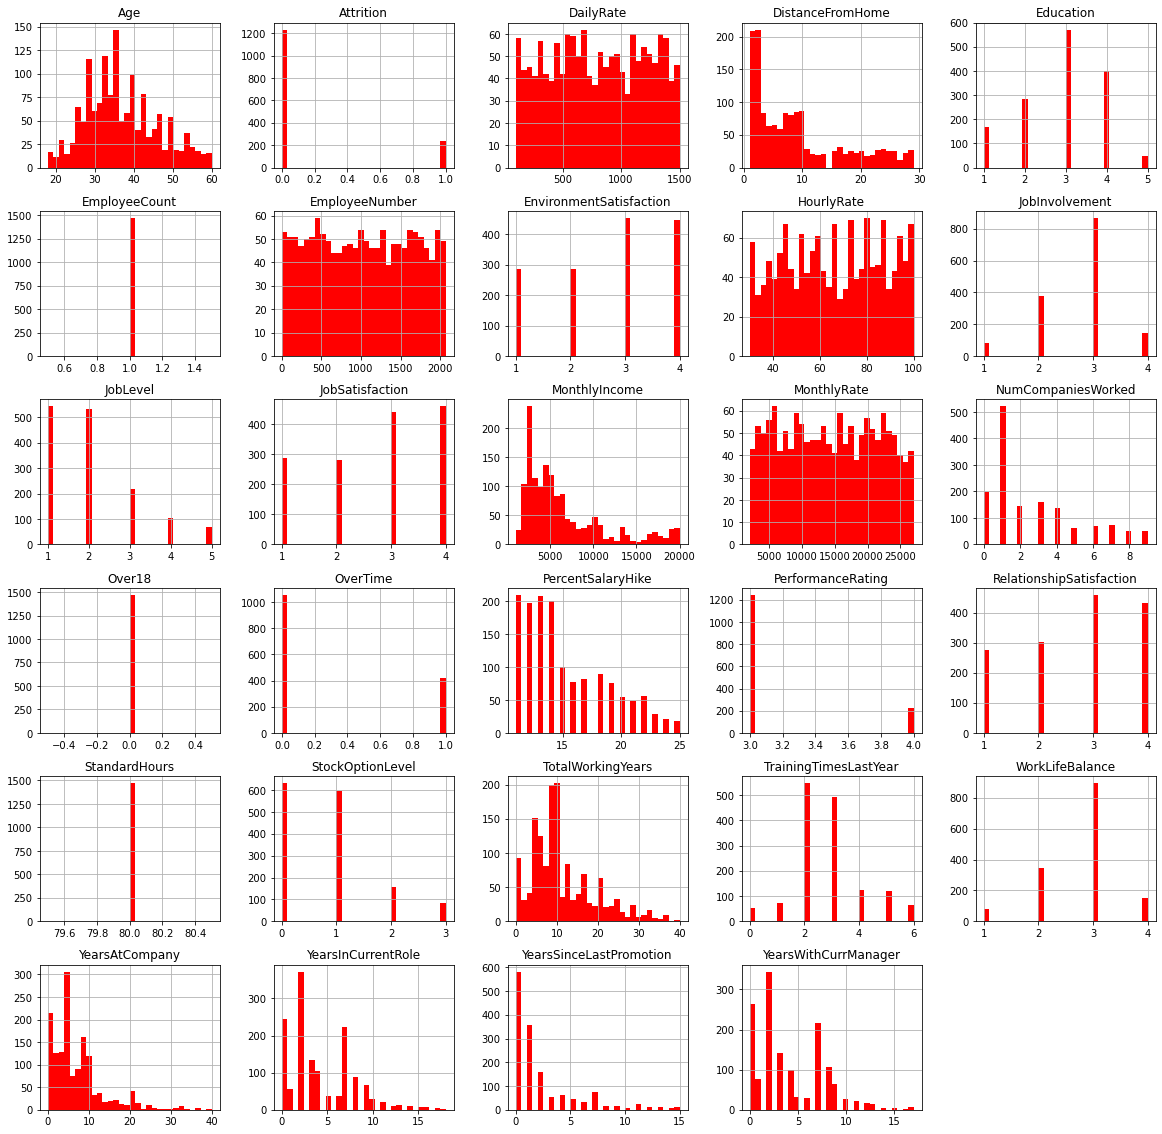

In [9]:
#several features such as 'monthly income' and 'totalworkingyears' are tail heavy 
#it makes sense to drop 'Employee Count' and 'Standardhours' since they do not change from one employee to the other 
df.hist(bins = 30, figsize = (20, 20), color= 'r')

In [10]:
df.drop(['EmployeeCount', "StandardHours", 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [11]:
#How many employees left the company 
left_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]

### Baseline Analysis 

In [12]:
#count the number of employees who stayed and left 
print('Total = ', len(df))
print('Number of employees who left =', len(left_df))
print('% of employees who left =', 1 * len(left_df)/len(df) * 100, '%')

print('Number of employees who stayed =', len(stayed_df))
print('% of employees who stayed =', 1 * len(stayed_df)/len(df) * 100, '%')

Total =  1470
Number of employees who left = 237
% of employees who left = 16.122448979591837 %
Number of employees who stayed = 1233
% of employees who stayed = 83.87755102040816 %


### High Level overvue of differences between employees who stayed and employees who left the company

In [13]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [14]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


- Key Takeaway: 
    - the mean for employees who left was more disadvantageous in almost every category

<AxesSubplot:>

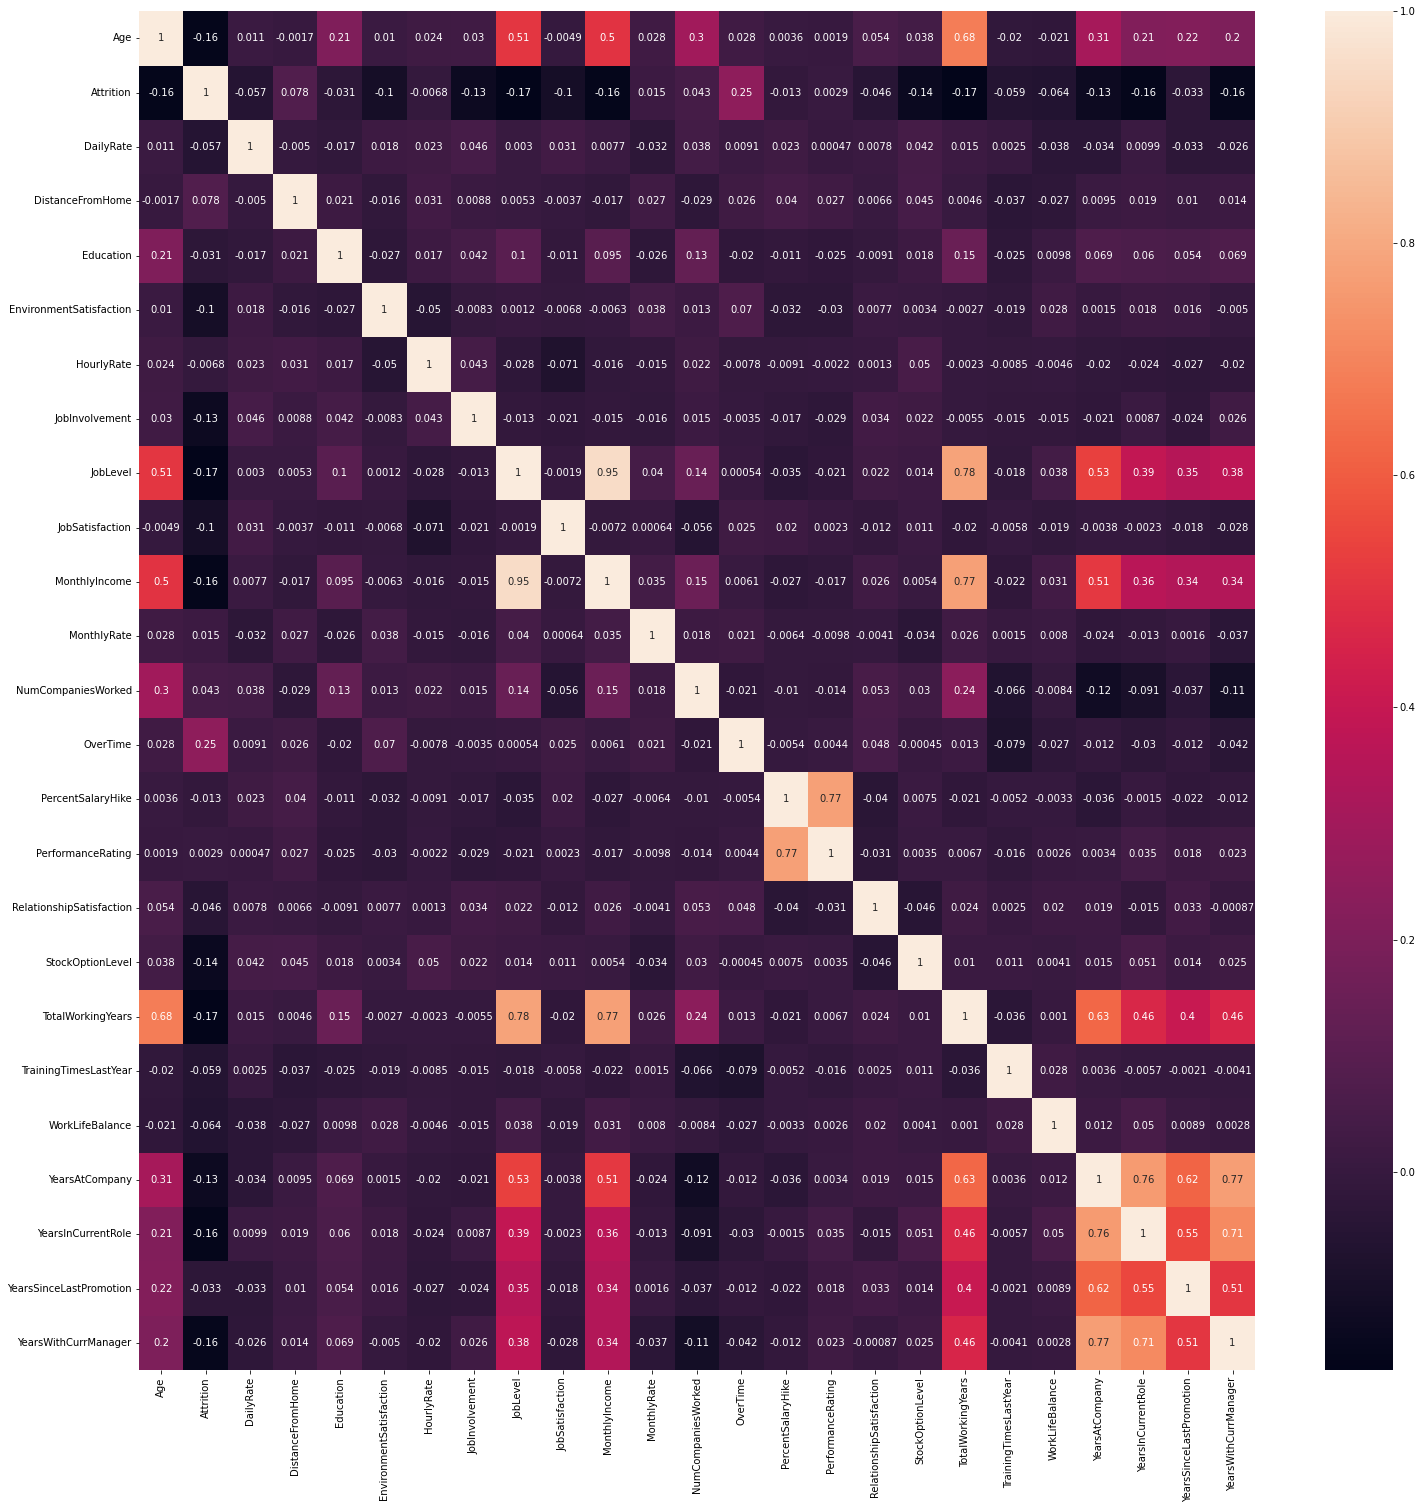

In [15]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(correlations, annot = True)

- High Correlations: 
    - Age and Total Working Years 
    - Job Level and Total Working Years 
    - Monthly Income and Total Working Years 
    - Monthly Income and Job Level 
    - Performance Rating and Percent Salary Hike 
    - Years at company and years with current manager 
    - years at company and years in current role 
    - years in current role and years with current manager 

In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [17]:
def split_zillow_data(df):
    '''
    This function performs split on zillow data
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    return train, validate, test

In [20]:
train, validate, test = split_zillow_data(df)

In [51]:
#How many employees left the company 
left_df = train[train['Attrition'] == 1]
stayed_df = train[train['Attrition'] == 0]

<AxesSubplot:xlabel='Age', ylabel='count'>

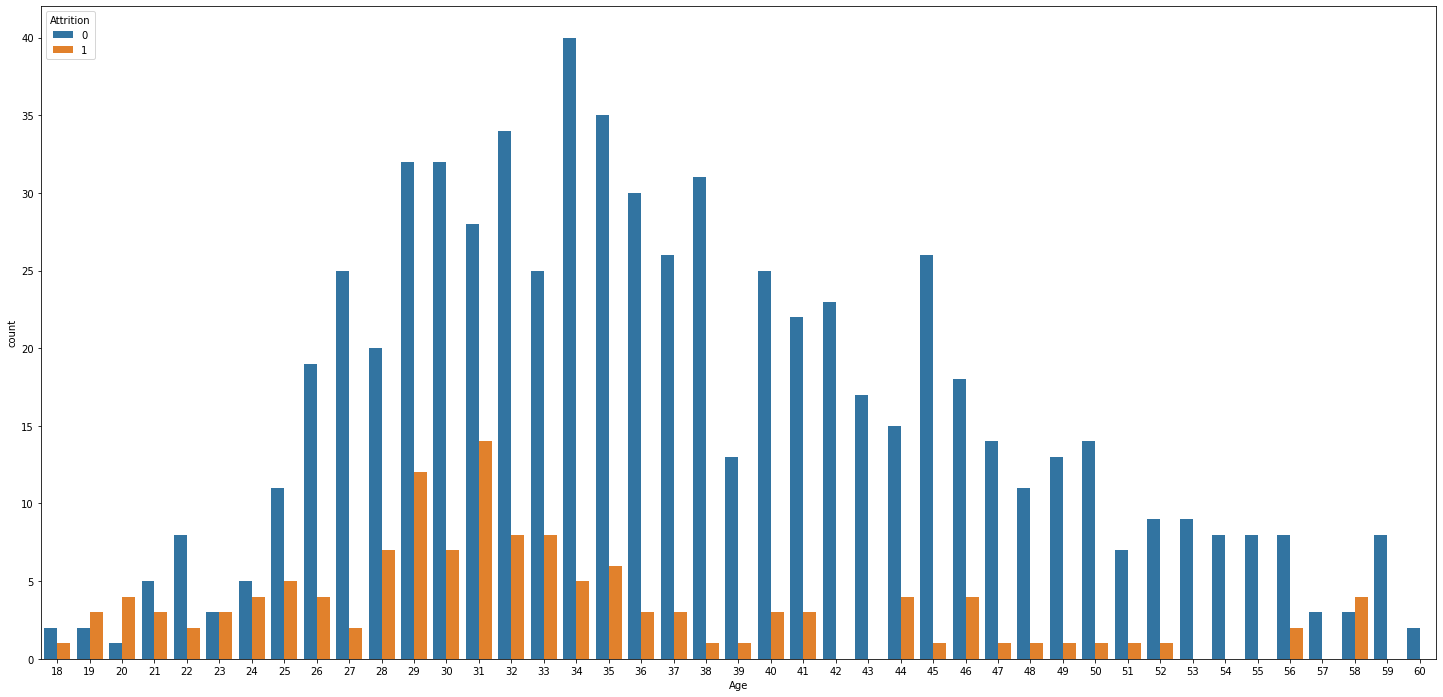

In [21]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='Age', hue ='Attrition', data = train)

In [68]:
#I want the table to be grouped by age just like in this chart 
#I want to see the percentage of people who left compared to total number of people in that age bracket 
Age = train.groupby('Age')
Age

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

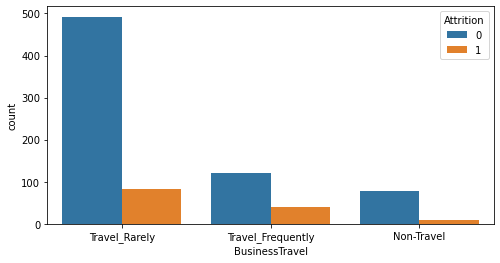

In [74]:
plt.figure(figsize = [8, 4])

sns.countplot(x ='BusinessTravel', hue ='Attrition', data = train)


<AxesSubplot:xlabel='Department', ylabel='count'>

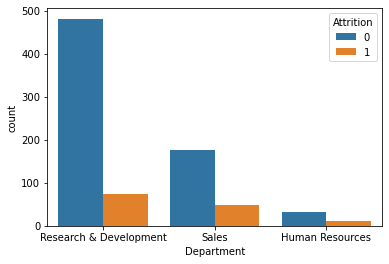

In [73]:
sns.countplot(x ='Department', hue ='Attrition', data = train)

- daily rate 

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

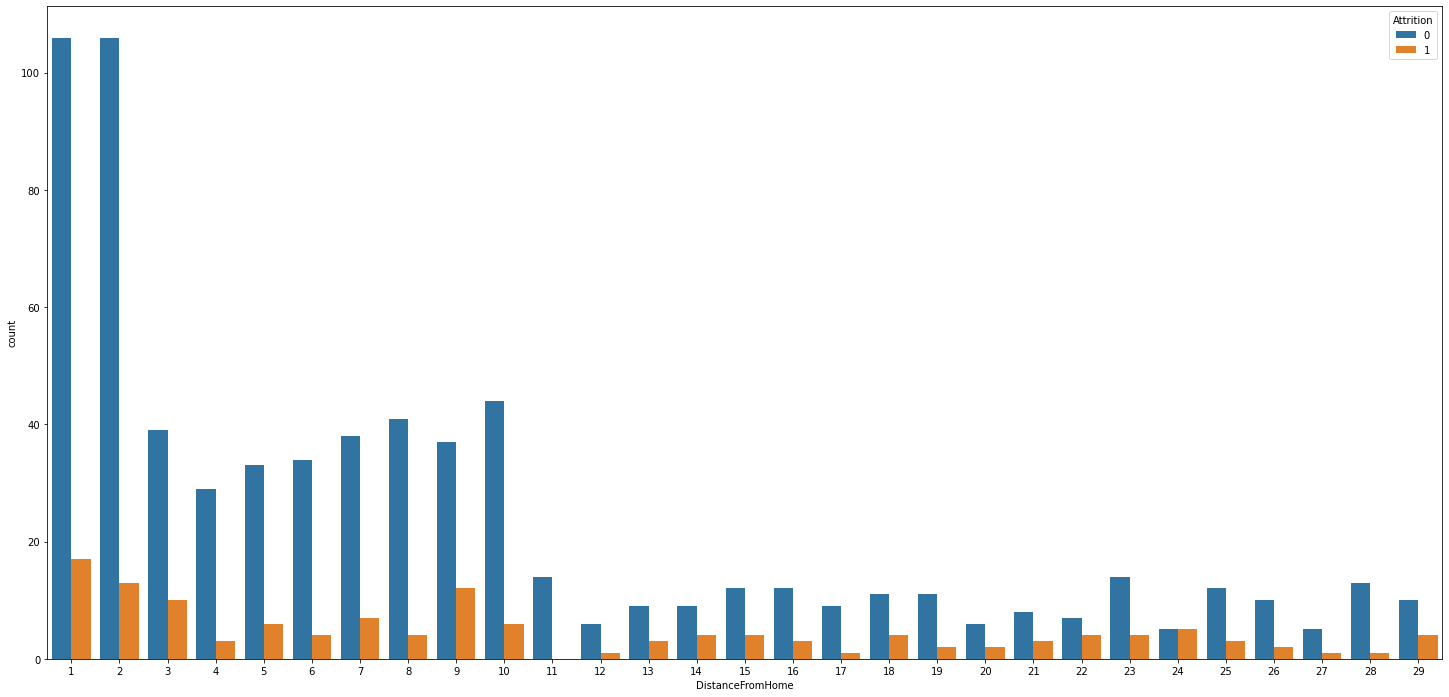

In [25]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='DistanceFromHome', hue ='Attrition', data = train)

<AxesSubplot:xlabel='Education', ylabel='count'>

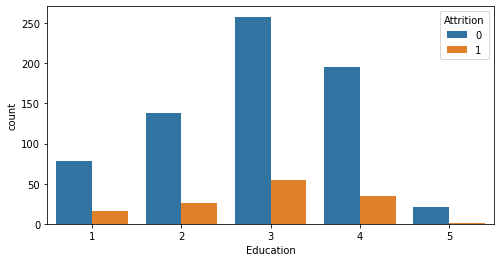

In [75]:
plt.figure(figsize = [8, 4])
sns.countplot(x ='Education', hue ='Attrition', data = train)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

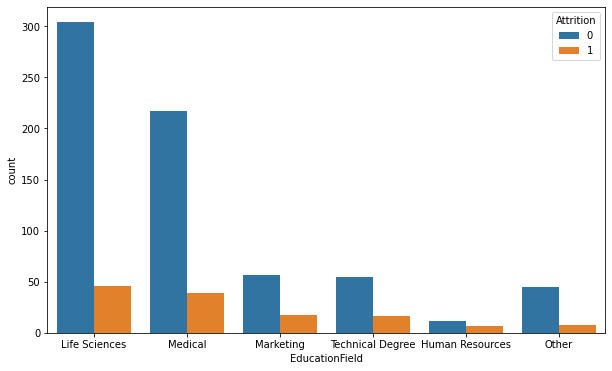

In [77]:
plt.figure(figsize = [10, 6])
sns.countplot(x ='EducationField', hue ='Attrition', data = train)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

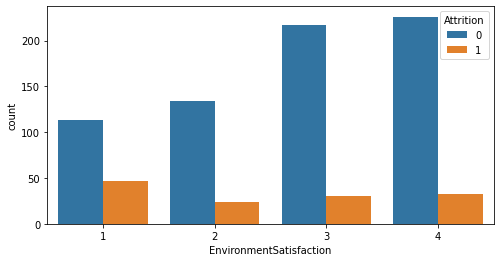

In [78]:
plt.figure(figsize = [8, 4])
sns.countplot(x ='EnvironmentSatisfaction', hue ='Attrition', data = train)

<AxesSubplot:xlabel='Gender', ylabel='count'>

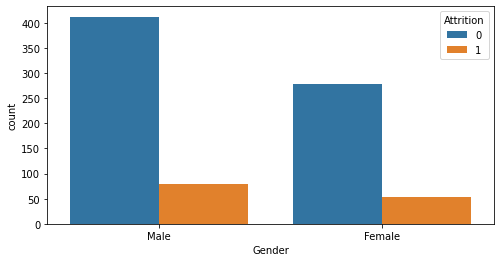

In [79]:
plt.figure(figsize = [8, 4])
sns.countplot(x ='Gender', hue ='Attrition', data = train)

<AxesSubplot:xlabel='HourlyRate', ylabel='count'>

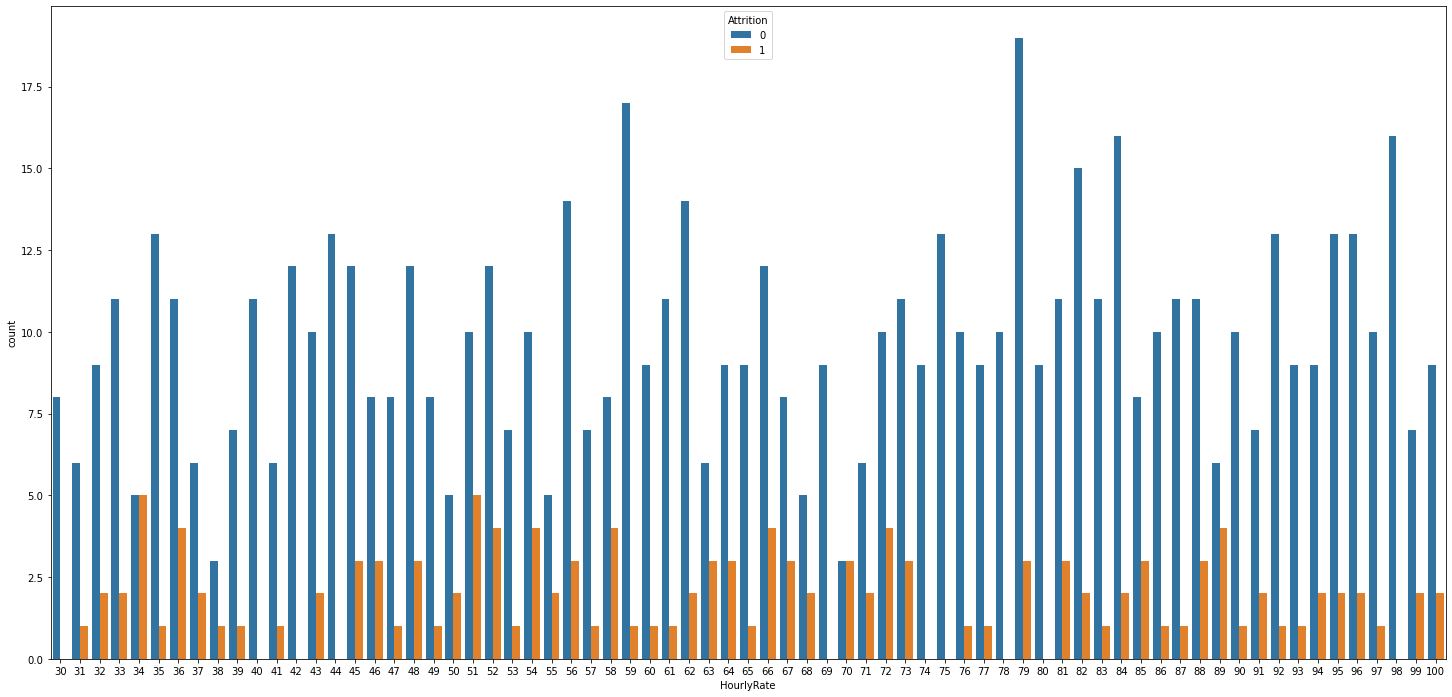

In [30]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='HourlyRate', hue ='Attrition', data = train)

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

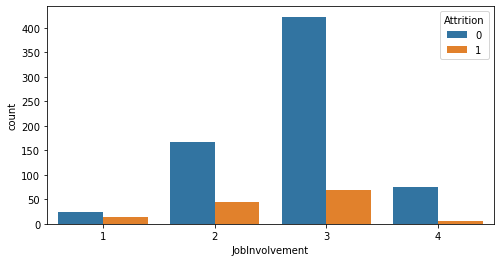

In [80]:
plt.figure(figsize = [8, 4])
sns.countplot(x ='JobInvolvement', hue ='Attrition', data = train)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

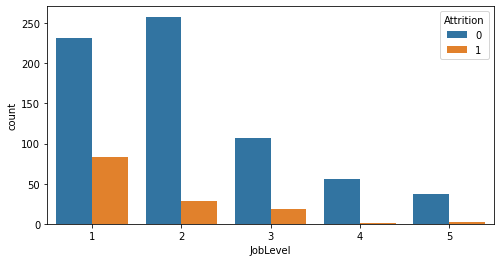

In [81]:
plt.figure(figsize = [8, 4])
sns.countplot(x ='JobLevel', hue ='Attrition', data = train)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

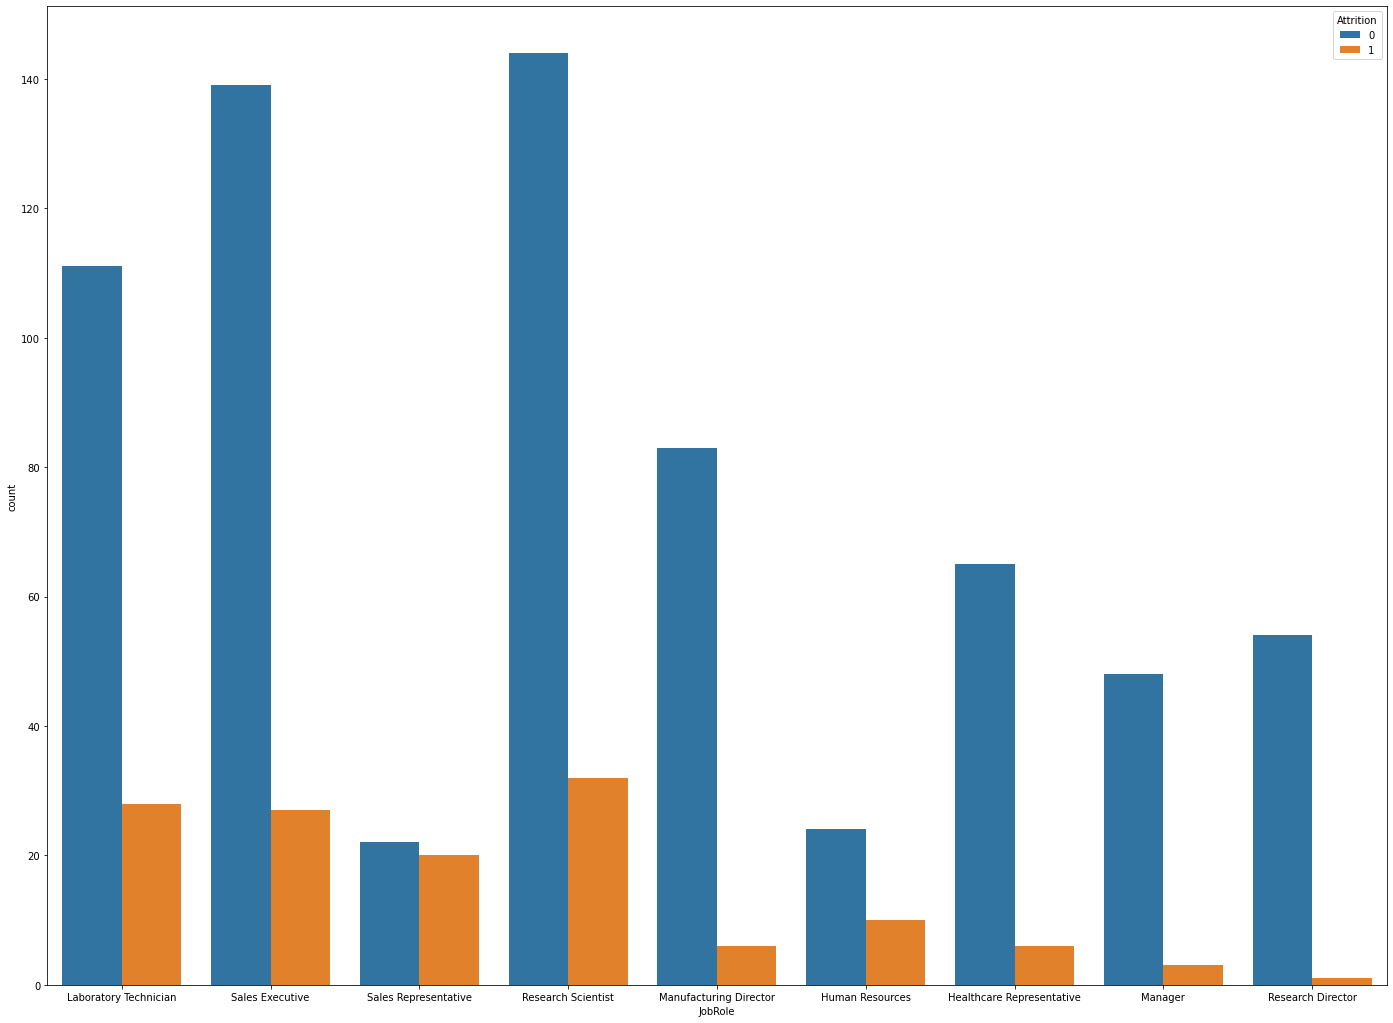

In [84]:
plt.figure(figsize = [24, 18])
sns.countplot(x ='JobRole', hue ='Attrition', data = train)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

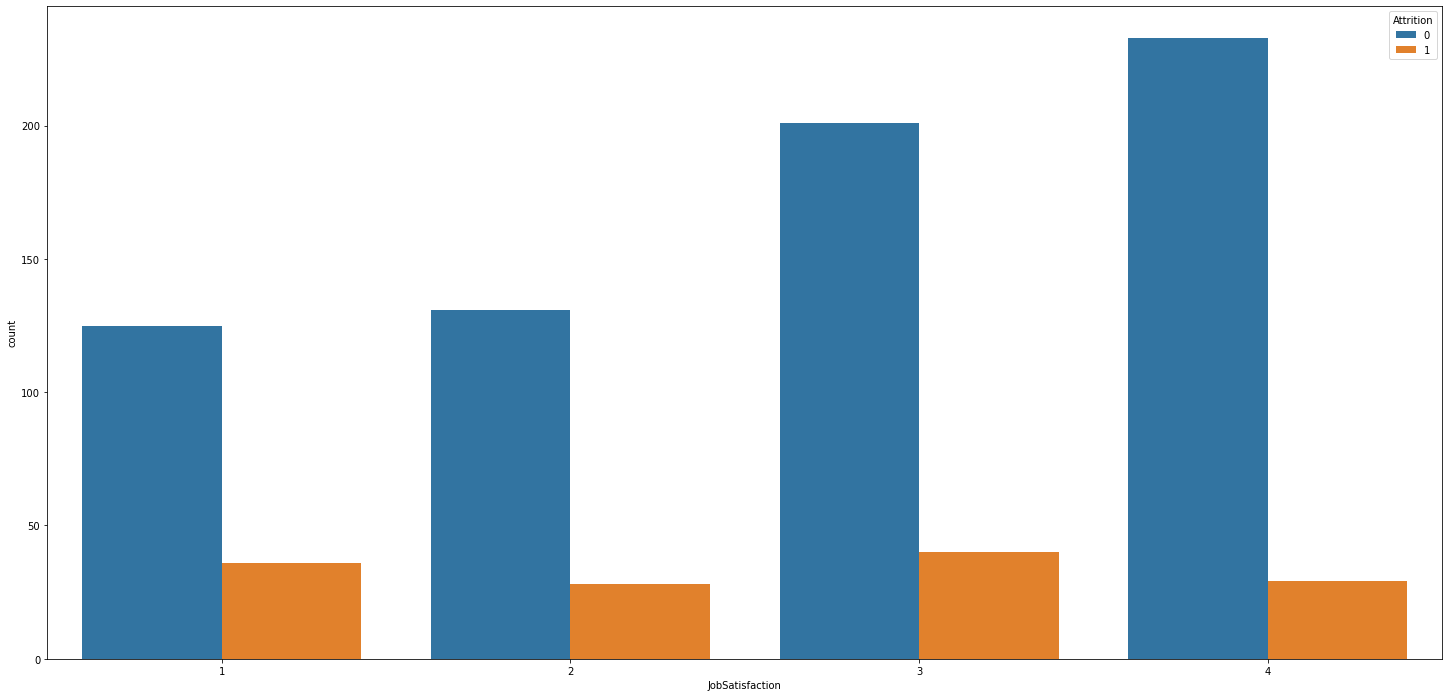

In [34]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='JobSatisfaction', hue ='Attrition', data = train)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

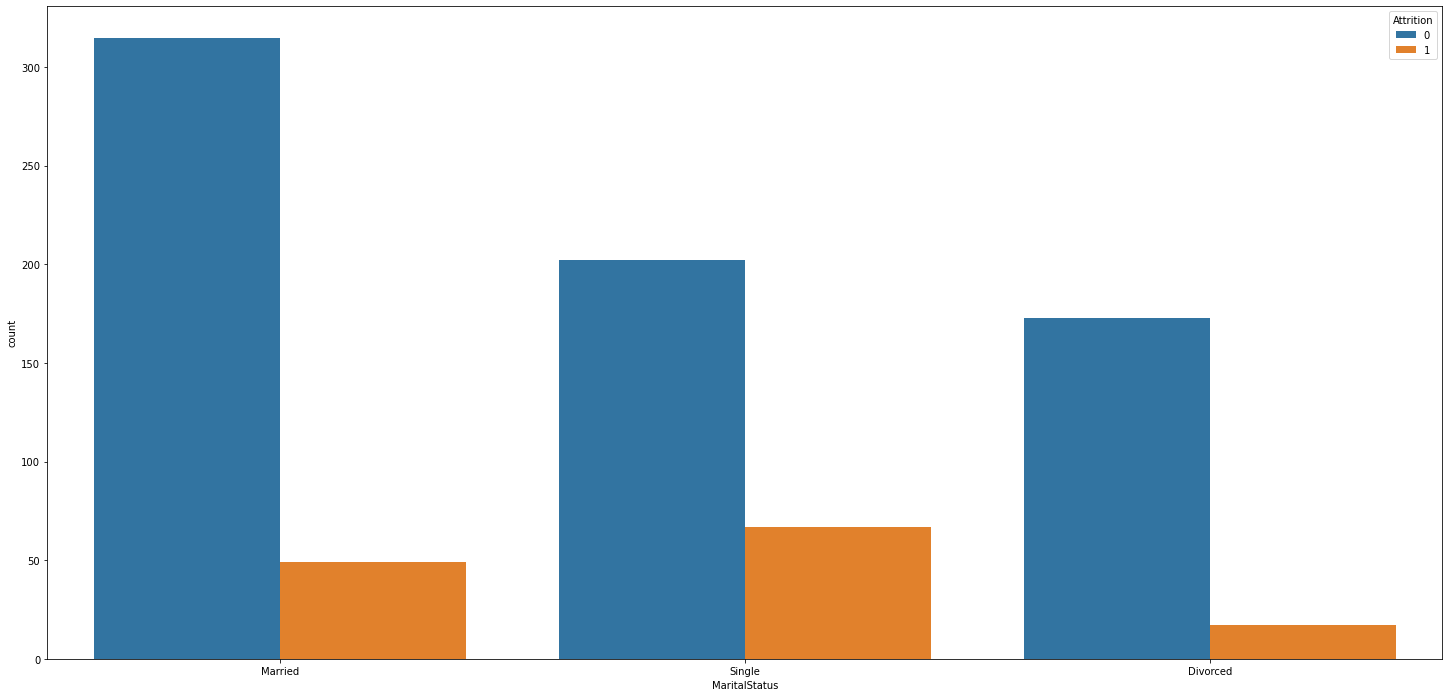

In [35]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='MaritalStatus', hue ='Attrition', data = train)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='count'>

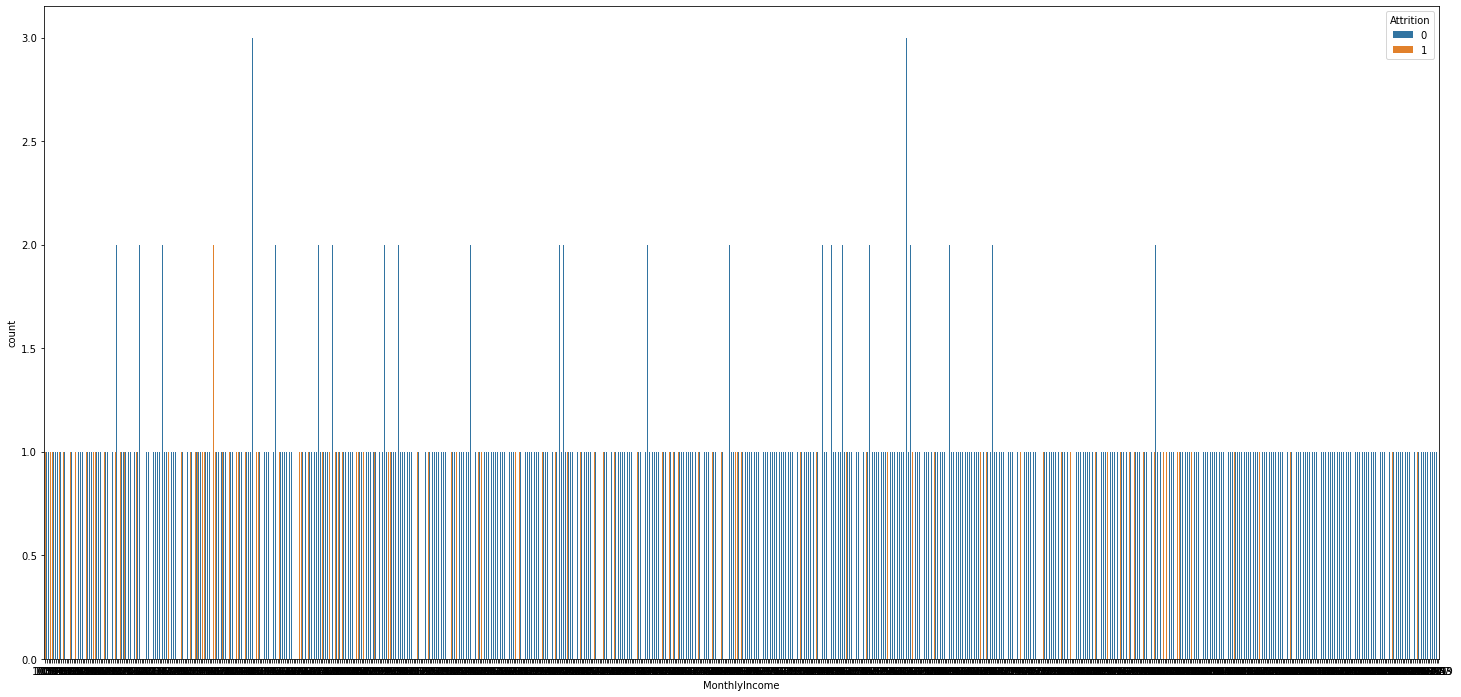

In [36]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='MonthlyIncome', hue ='Attrition', data = train)

<AxesSubplot:xlabel='MonthlyRate', ylabel='count'>

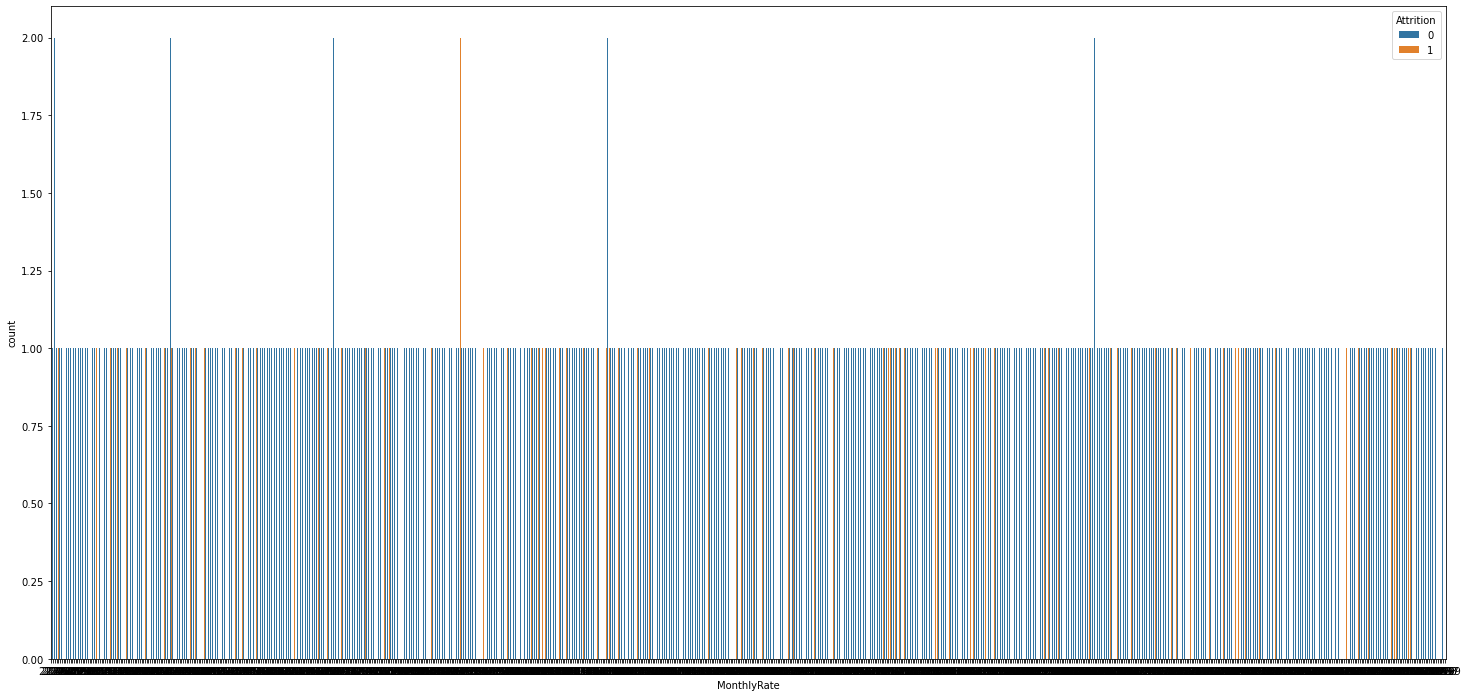

In [37]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='MonthlyRate', hue ='Attrition', data = train)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

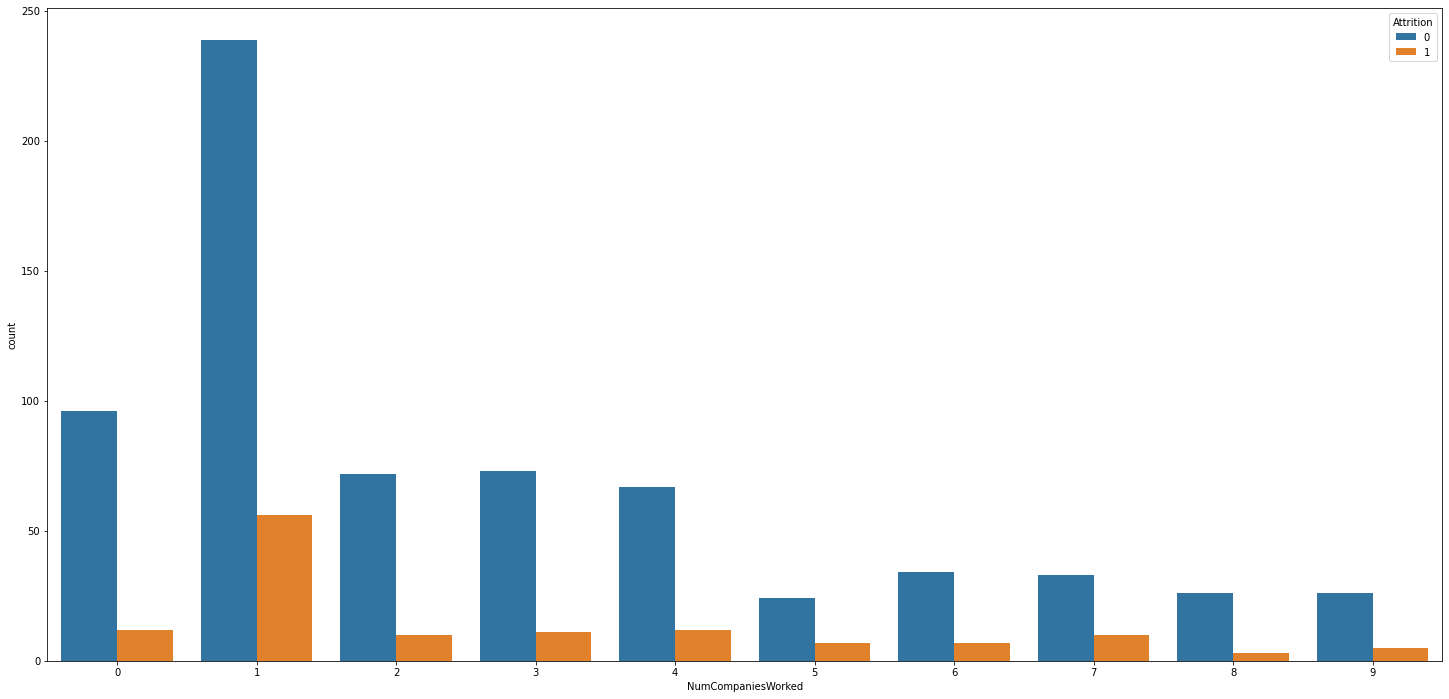

In [38]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='NumCompaniesWorked', hue ='Attrition', data = train)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

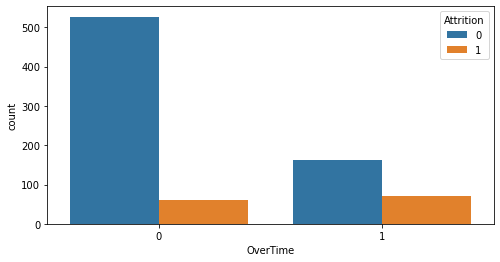

In [83]:
plt.figure(figsize = [8, 4])
sns.countplot(x ='OverTime', hue ='Attrition', data = train)

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

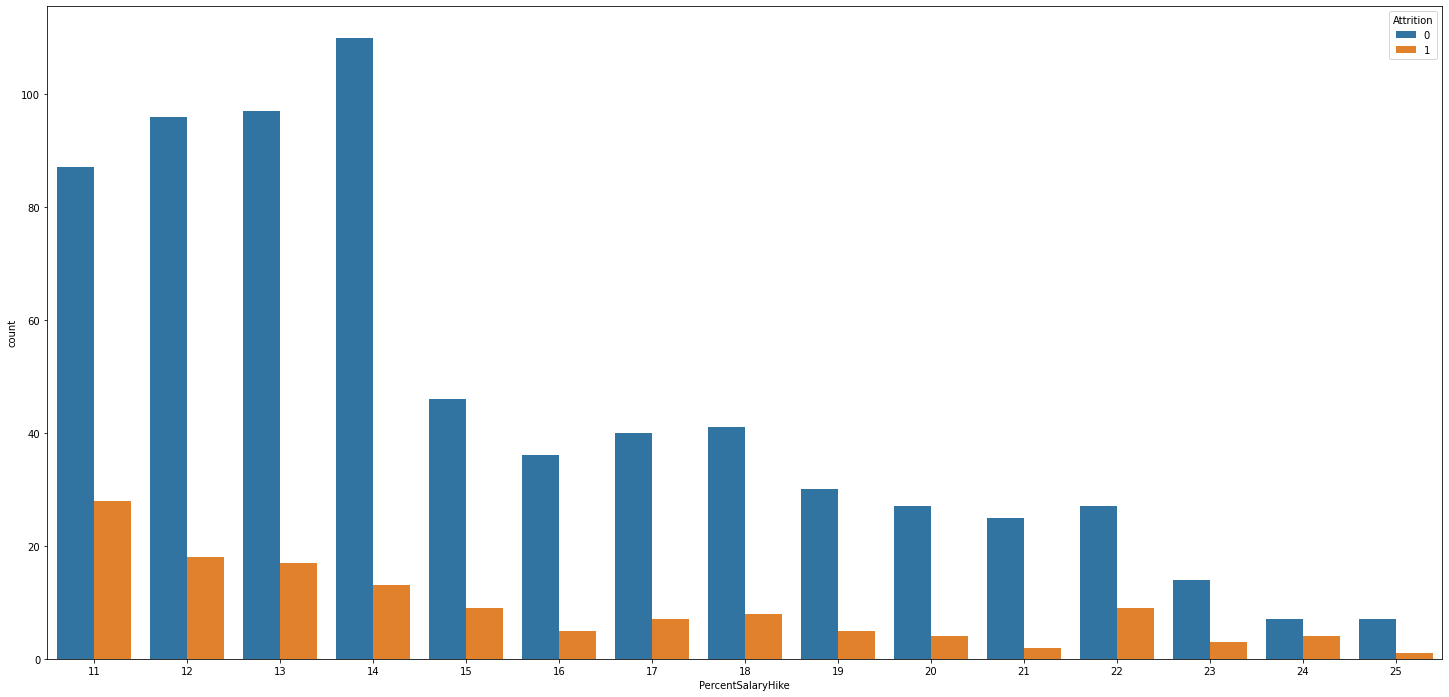

In [40]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='PercentSalaryHike', hue ='Attrition', data = train)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

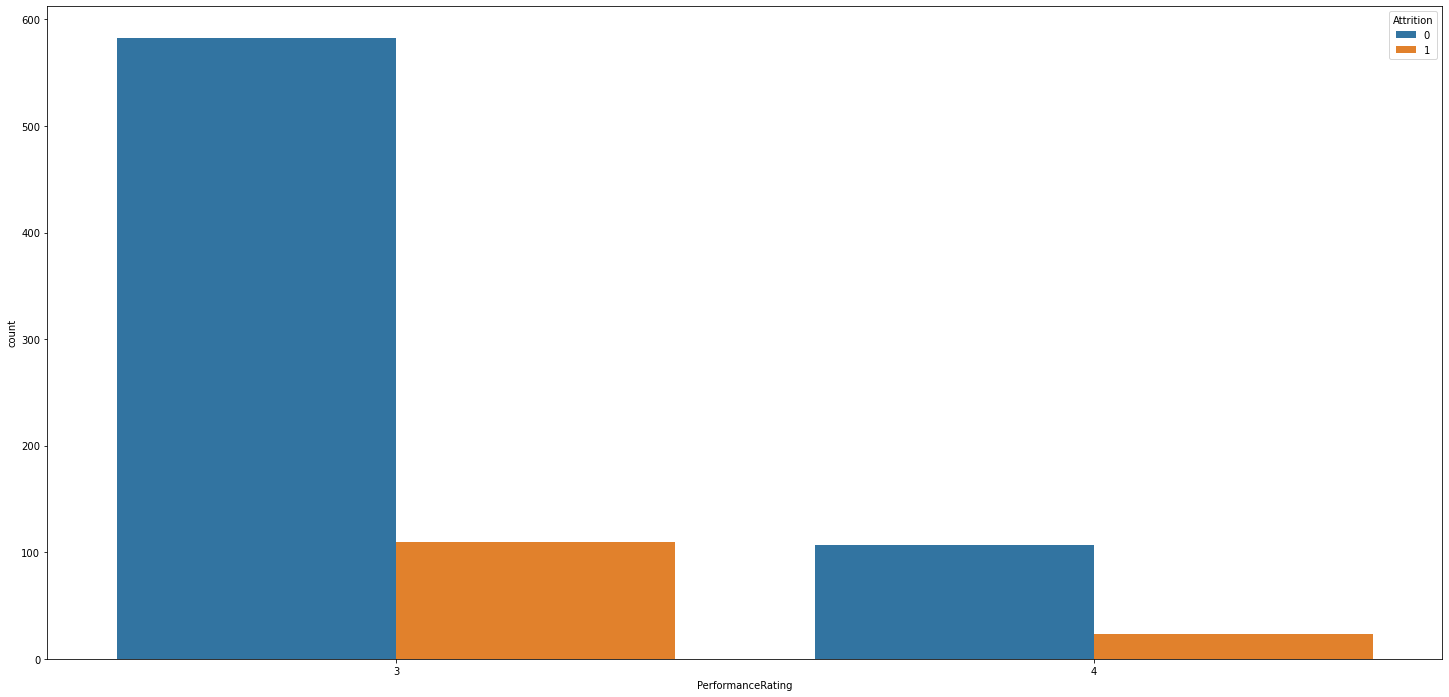

In [41]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='PerformanceRating', hue ='Attrition', data = train)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

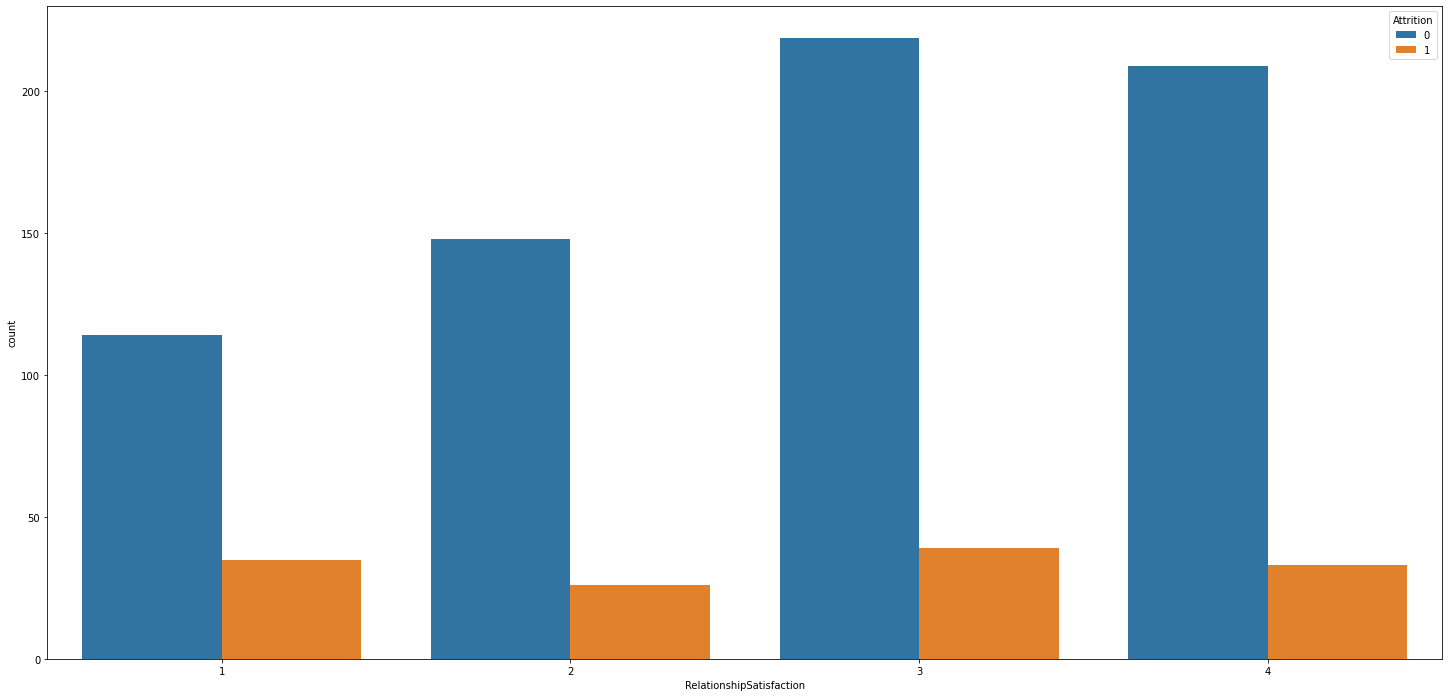

In [42]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='RelationshipSatisfaction', hue ='Attrition', data = train)

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

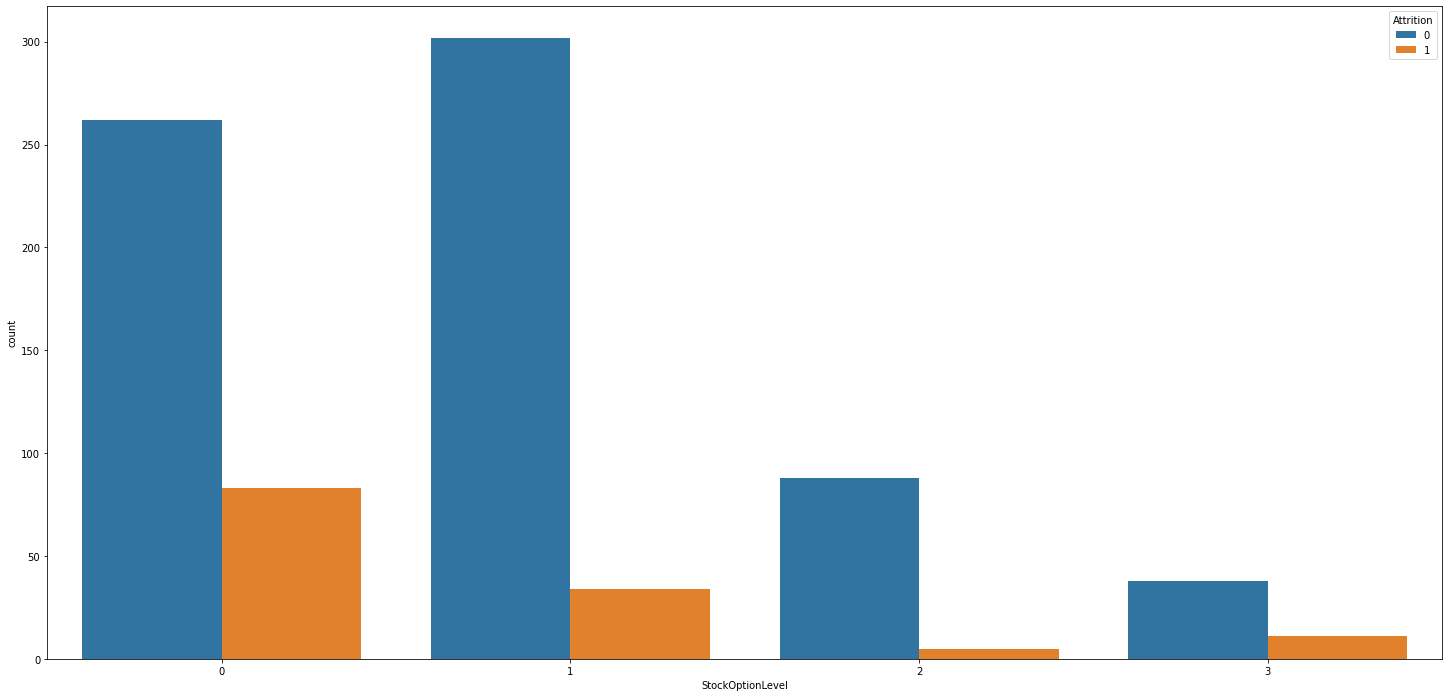

In [43]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='StockOptionLevel', hue ='Attrition', data = train)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

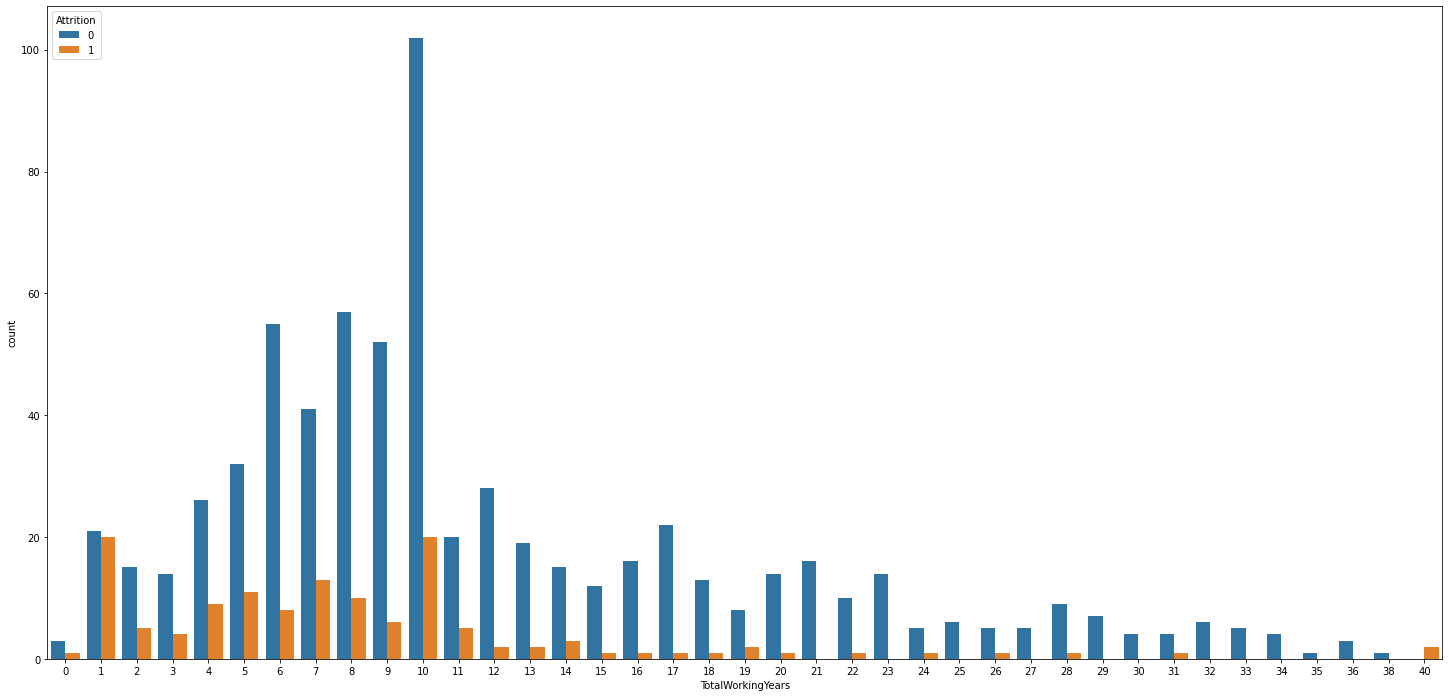

In [44]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='TotalWorkingYears', hue ='Attrition', data = train)

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

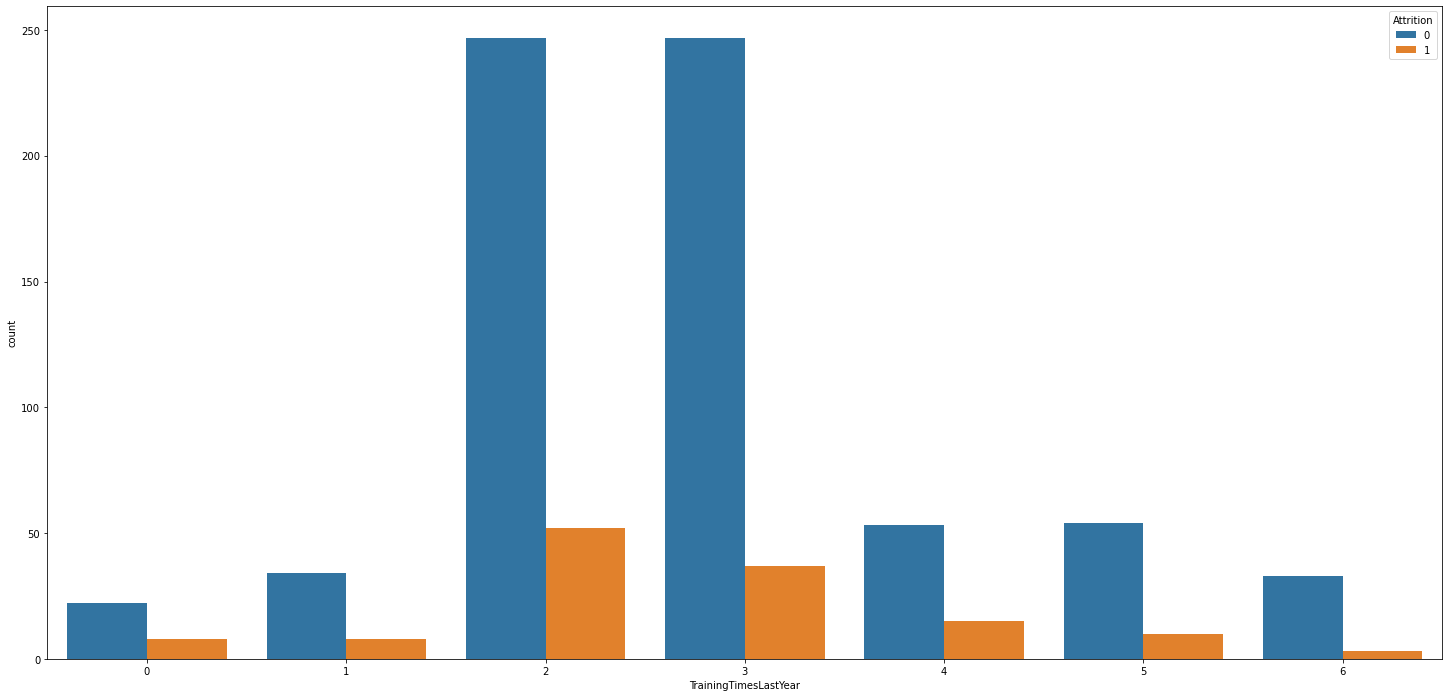

In [45]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='TrainingTimesLastYear', hue ='Attrition', data = train)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

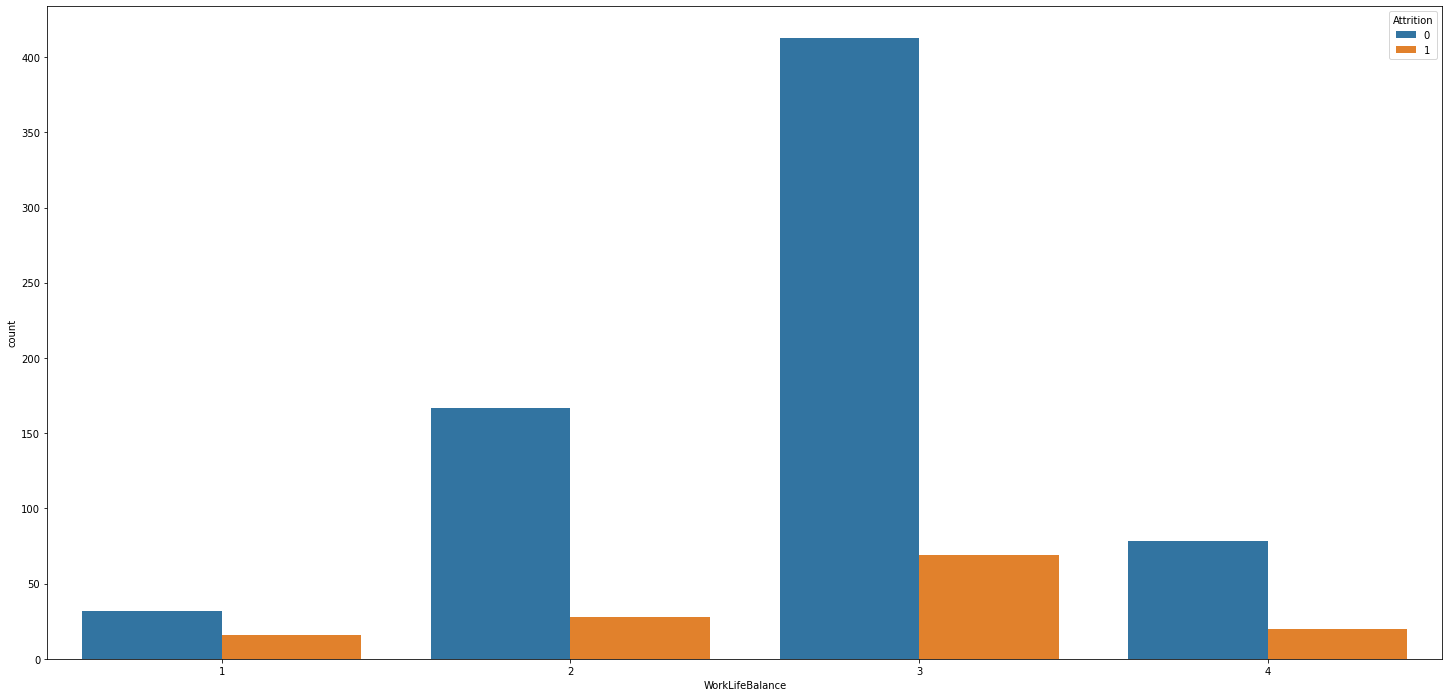

In [46]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='WorkLifeBalance', hue ='Attrition', data = train)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

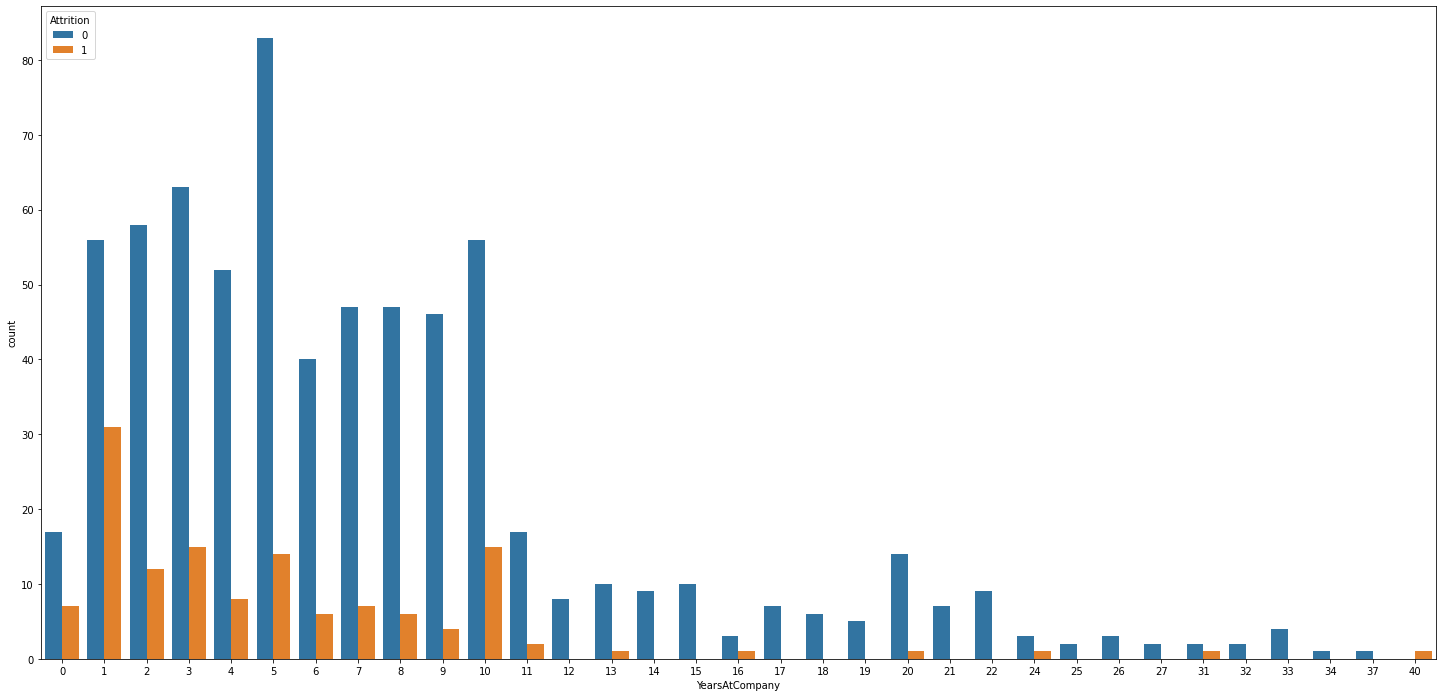

In [47]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='YearsAtCompany', hue ='Attrition', data = train)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

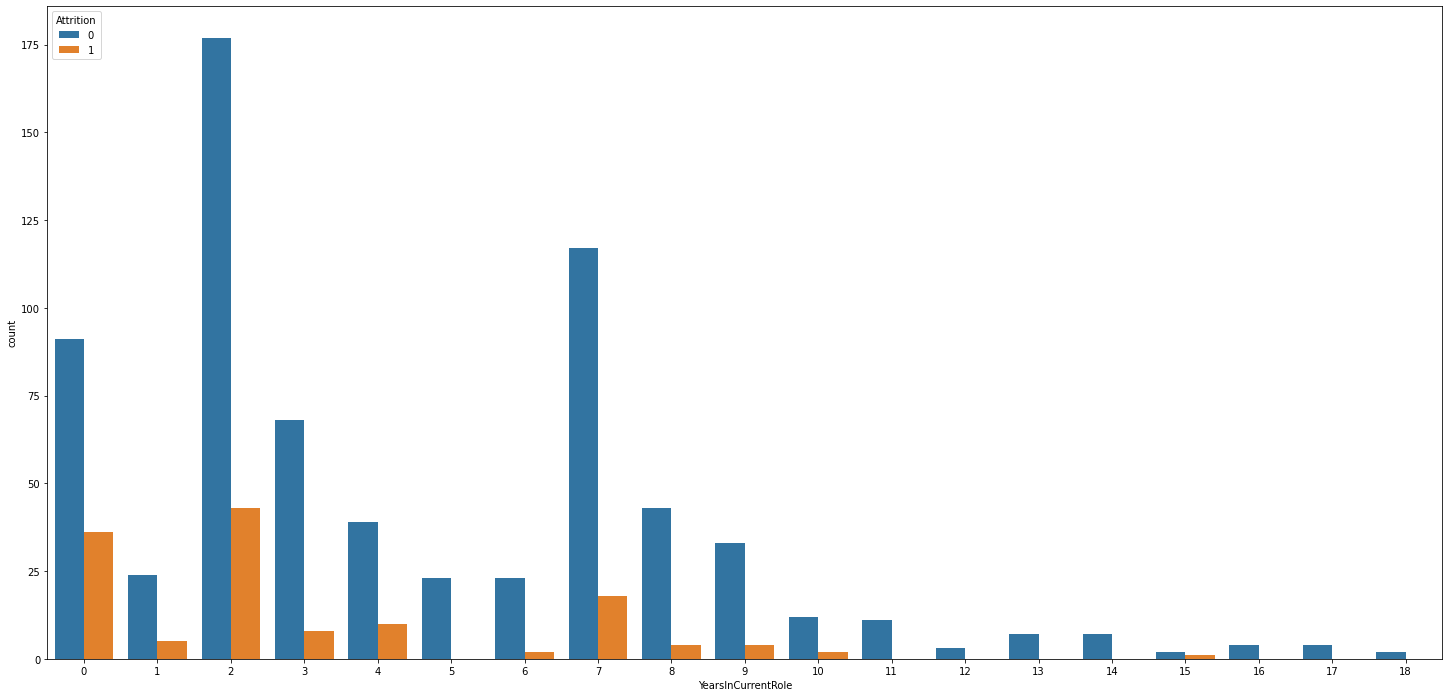

In [48]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='YearsInCurrentRole', hue ='Attrition', data = train)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

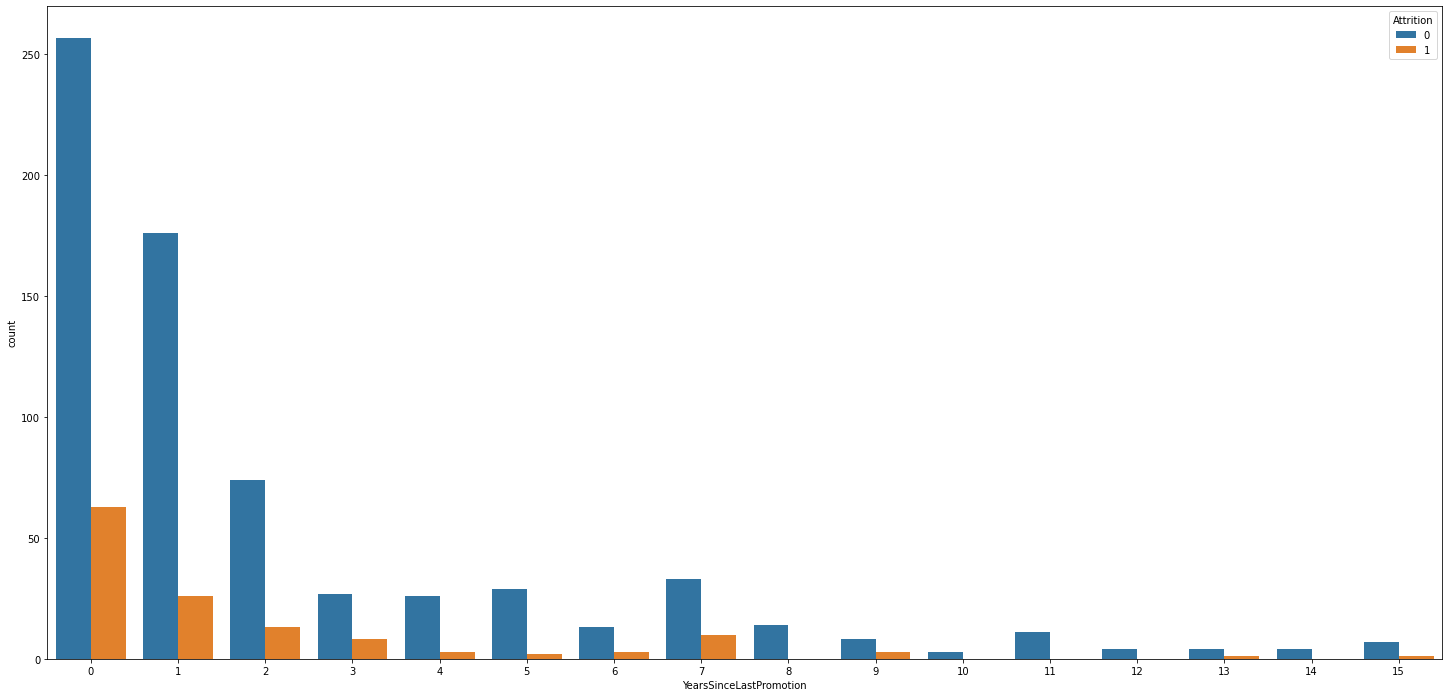

In [49]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='YearsSinceLastPromotion', hue ='Attrition', data = train)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

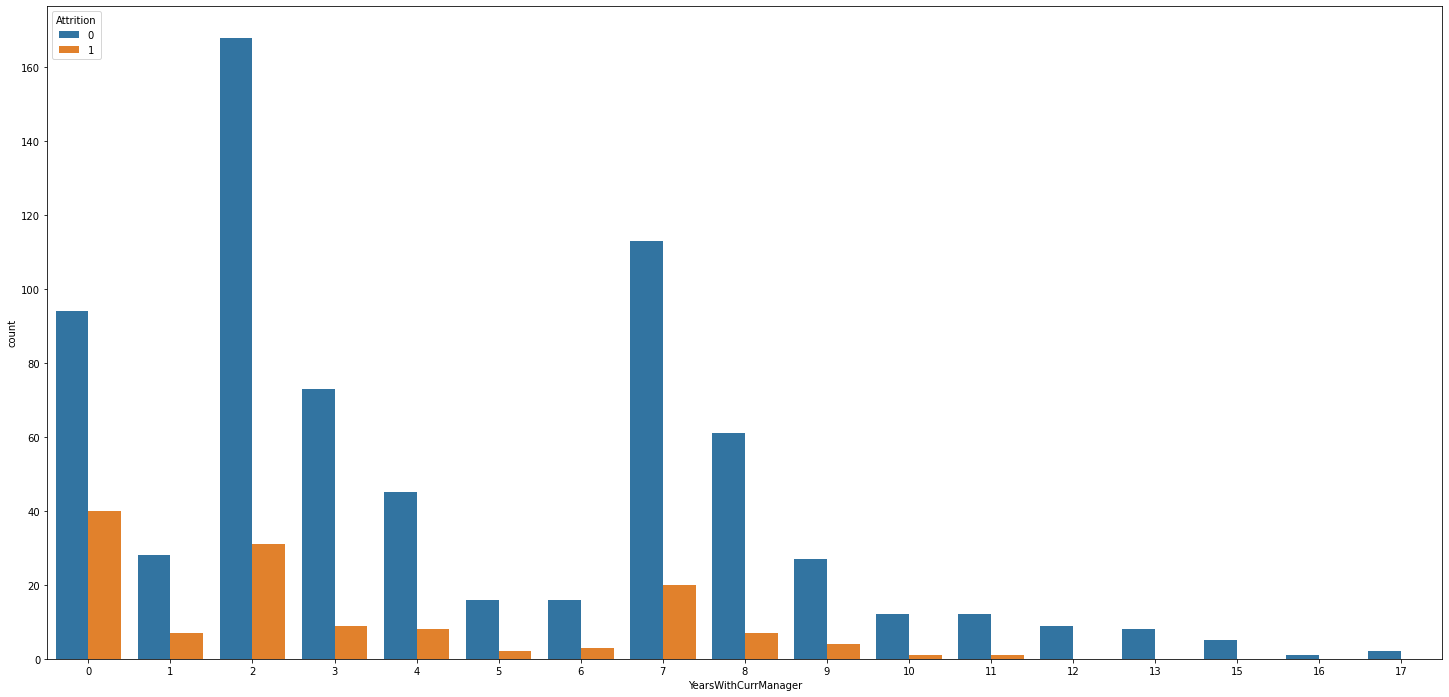

In [50]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='YearsWithCurrManager', hue ='Attrition', data = train)

In [ ]:
- Key Takeaways: 
    - 

In [ ]:
plt.figure(figsize = [25, 12])
sns.countplot(x ='DailyRate', hue ='Attrition', data = train)